This report shows some interesting information about a wide range of compiled x86-64 PE files.



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("https://media.githubusercontent.com/media/backengineering/binstats/refs/heads/master/summary.csv")

Below is the layout of the dataframe.

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Executable                    21 non-null     object 
 1   AvgBasicBlockSize             21 non-null     float64
 2   LargestFunction               21 non-null     object 
 3   LargestFunctionSize           21 non-null     int64  
 4   NumBasicBlocksInLargestFunc   21 non-null     int64  
 5   NumInstructionsInLargestFunc  21 non-null     int64  
 6   AvgFunctionSize               21 non-null     float64
 7   LargestInstructionAddress     21 non-null     object 
 8   LargestInstructionMnemonic    21 non-null     object 
 9   MostReferencedBlock           21 non-null     object 
 10  MostReferencedCount           21 non-null     int64  
 11  MostReferencedBlockSize       21 non-null     int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 2.1+ KB


Average basic block size distribution.

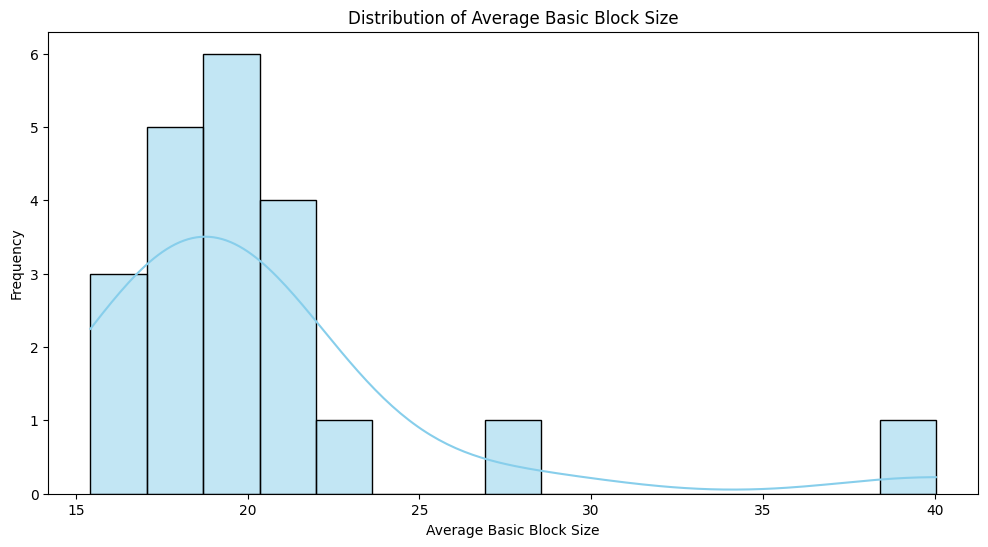

In [4]:
plt.figure(figsize=(12, 6))
sns.histplot(df['AvgBasicBlockSize'], bins=15, kde=True, color="skyblue")
plt.title("Distribution of Average Basic Block Size")
plt.xlabel("Average Basic Block Size")
plt.ylabel("Frequency")
plt.show()

Largest function size comparison.

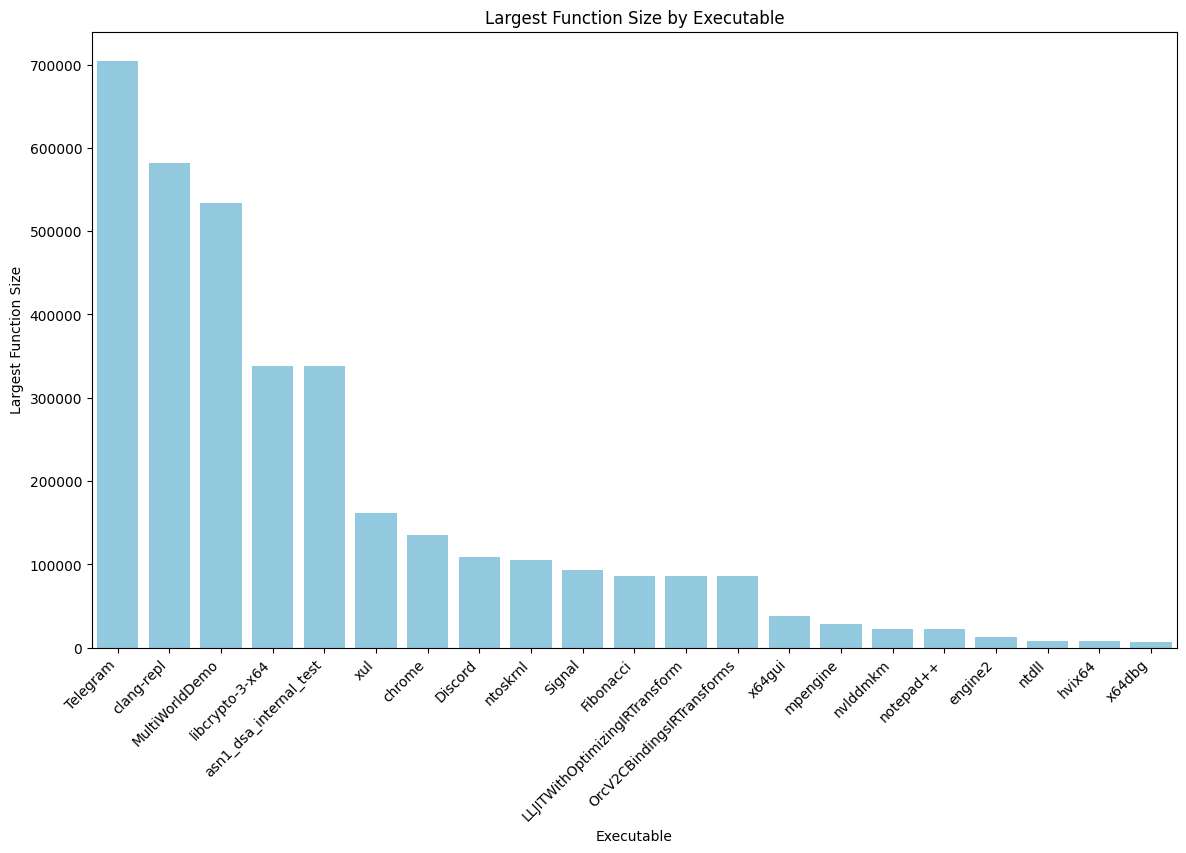

In [5]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df.sort_values("LargestFunctionSize", ascending=False),
            x="Executable", y="LargestFunctionSize", color="skyblue")
plt.xticks(rotation=45, ha='right')
plt.title("Largest Function Size by Executable")
plt.xlabel("Executable")
plt.ylabel("Largest Function Size")
plt.show()

Average function size vs the average basic block size.

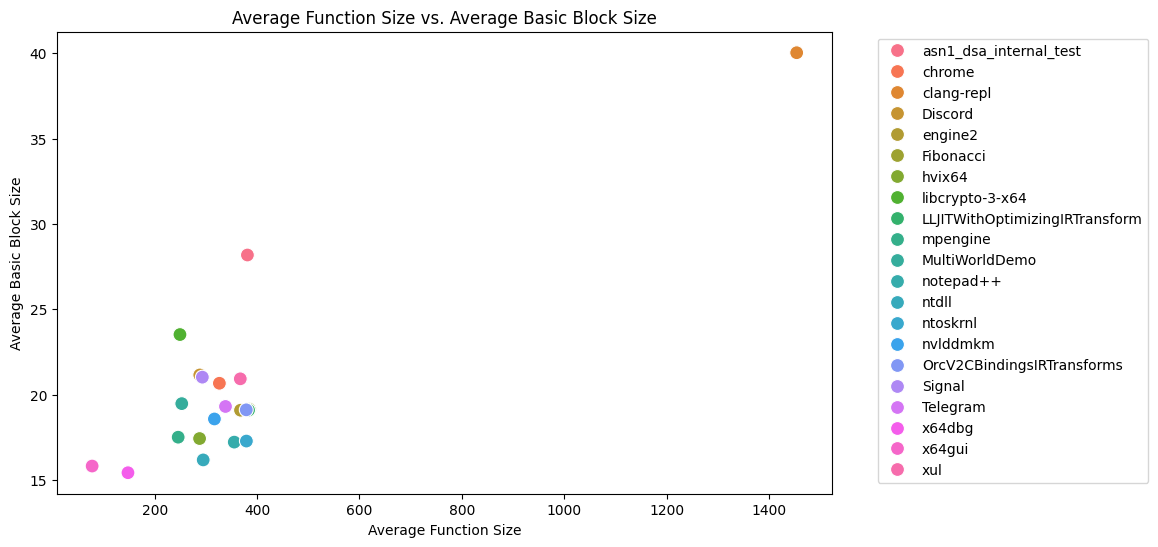

In [7]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="AvgFunctionSize", y="AvgBasicBlockSize", hue="Executable", s=100)
plt.title("Average Function Size vs. Average Basic Block Size")
plt.xlabel("Average Function Size")
plt.ylabel("Average Basic Block Size")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Size of the most referenced basic block

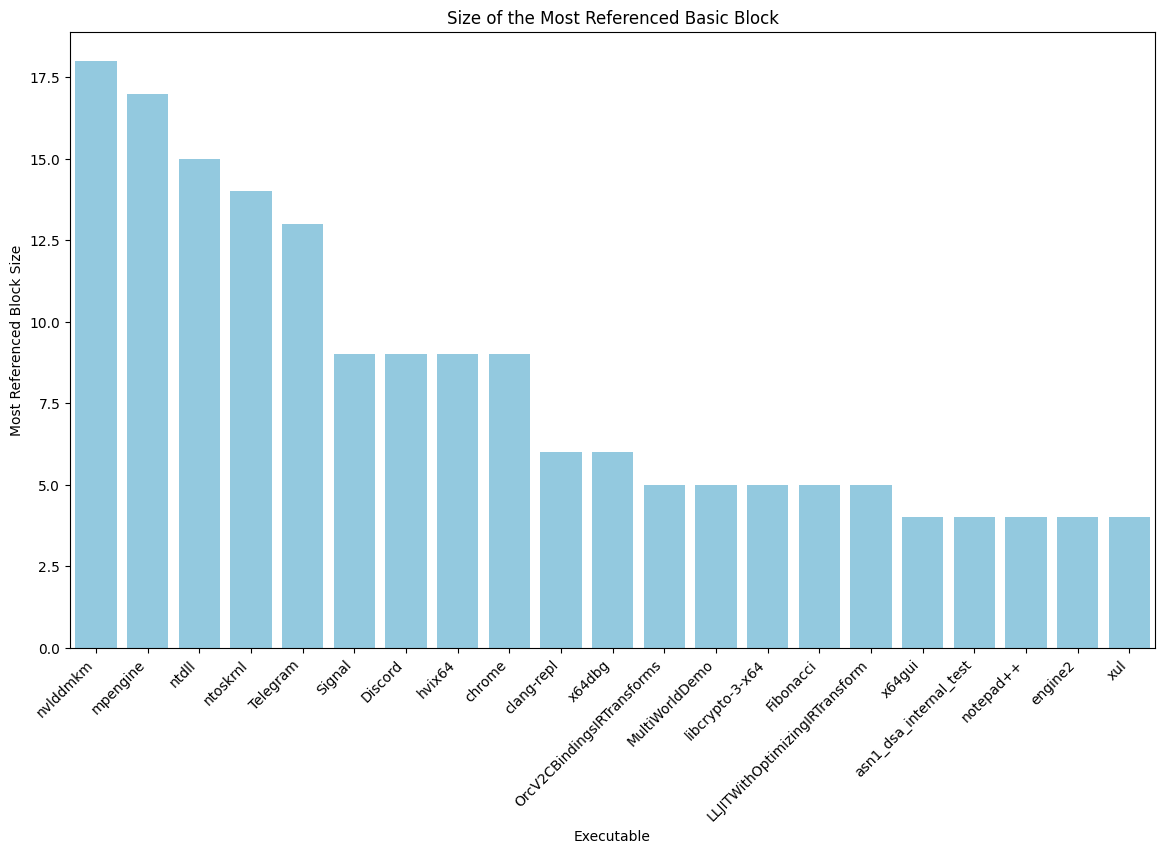

In [14]:
plt.figure(figsize=(14, 8))
sns.barplot(data=df.sort_values("MostReferencedBlockSize", ascending=False),
            x="Executable", y="MostReferencedBlockSize", color="skyblue");
plt.xticks(rotation=45, ha='right')
plt.title("Size of the Most Referenced Basic Block")
plt.xlabel("Executable")
plt.ylabel("Most Referenced Block Size")
plt.show();